### UNIT 8 인구 구조를 다양한 형태로 시각화 하기

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<BarContainer object of 10 artists>

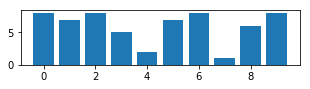

In [7]:
# 막대그래프 (X, Y)
plt.figure(figsize=(5, 1))
plt.bar(np.arange(10), np.random.randint(1, 10, 10))

<BarContainer object of 10 artists>

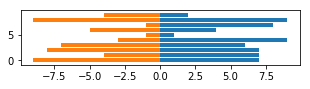

In [10]:
# 수평막대그래프 (X, Y)
plt.figure(figsize=(5, 1))
plt.barh(np.arange(10), np.random.randint(1, 10, 10))
plt.barh(np.arange(10), -np.random.randint(1, 10, 10))

In [61]:
data = pd.read_csv('201905_Korean_ages_gender_month.csv', encoding='cp949')
data = data.replace(',', '', regex=True)
data.head()

,행정구역,2019년05월_남_총인구수,2019년05월_남_연령구간인구수,2019년05월_남_0세,2019년05월_남_1세,2019년05월_남_2세,2019년05월_남_3세,2019년05월_남_4세,2019년05월_남_5세,2019년05월_남_6세,...,2019년05월_여_91세,2019년05월_여_92세,2019년05월_여_93세,2019년05월_여_94세,2019년05월_여_95세,2019년05월_여_96세,2019년05월_여_97세,2019년05월_여_98세,2019년05월_여_99세,2019년05월_여_100세 이상
0,서울특별시 (1100000000),4766085,4766085,27555,29820,32375,35374,36243,35430,37918,...,5447,4224,3122,2294,1937,1752,1254,811,632,4526
1,서울특별시 종로구 (1111000000),74240,74240,326,319,379,410,443,424,495,...,112,88,76,53,43,39,39,18,26,163
2,서울특별시 종로구 청운효자동(1111051500),6015,6015,28,32,40,41,60,39,48,...,4,4,9,3,4,3,1,3,3,13
3,서울특별시 종로구 사직동(1111053000),4259,4259,16,29,31,27,39,30,46,...,9,4,8,2,2,7,1,1,4,13
4,서울특별시 종로구 삼청동(1111054000),1330,1330,2,5,5,7,6,5,4,...,7,2,0,2,0,1,0,0,1,7


In [71]:
max_age = 101
man_age0_idx = list(data.columns).index('2019년05월_남_0세')
woman_age0_idx = list(data.columns).index('2019년05월_여_0세')

In [82]:
pops_age = np.array(data)

city = '청운효자동'

for i in range(len(pops_age)):
    if (city in pops_age[i, 0]):
        break

man_age = pops_age[i, man_age0_idx:(man_age0_idx + max_age)].astype(np.int)
woman_age = pops_age[i, woman_age0_idx:(woman_age0_idx + max_age)].astype(np.int)

(array([ 28,  32,  40,  41,  60,  39,  48,  51,  70,  45,  64,  61,  75,
         52,  78,  74,  74,  74,  85,  72,  82,  75,  87,  94,  79,  66,
         82,  98,  74,  74,  81,  91,  68,  79,  75,  81,  72,  93, 104,
         97,  97,  92,  86,  75,  98, 117, 108, 132, 107,  99, 114,  93,
         93, 118,  81,  87, 100,  87,  91,  81,  83,  75,  44,  78,  77,
         54,  48,  40,  41,  36,  53,  43,  44,  37,  42,  34,  57,  47,
         44,  40,  41,  28,  22,  30,  14,  22,  14,  11,   4,   4,   7,
          1,   6,   4,   5,   4,   3,   3,   1,   0,   3]),
 array([ 33,  43,  45,  36,  44,  51,  49,  56,  48,  52,  51,  68,  68,
         53,  47,  57,  58,  59,  67,  82,  80,  78,  83,  92,  73,  84,
         96,  88,  87,  68,  71,  82,  86,  96,  80, 106,  94, 113, 134,
        123, 125, 104, 119, 139, 124, 139, 138, 139, 121, 142, 141, 111,
        108, 110, 101,  85,  93,  82, 100, 102,  90,  81,  84,  89,  66,
         63,  71,  66,  55,  75,  56,  75,  73,  57,  63,  56,  

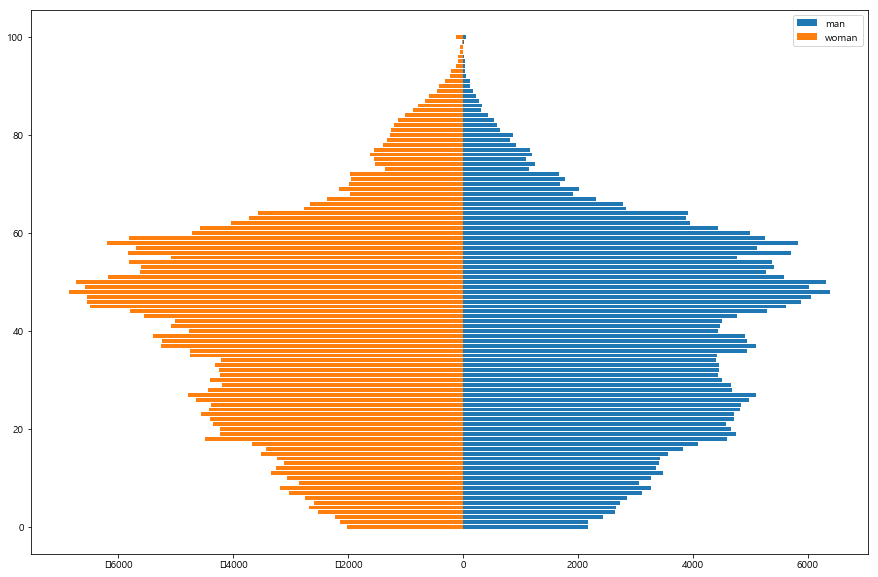

In [145]:
plt.figure(figsize=(15, 10))
plt.barh(np.arange(len(man_age)), man_age, label='man')
plt.barh(np.arange(len(woman_age)), -woman_age, label='woman')
plt.legend()
plt.show()

In [162]:
city = '동안구' # 이 글자가 들어간 행은 전부 찾자, 조건부 검색, 마스크(True만 뽑기)
is_contain = []
for i in range(len(pops_age)):
    is_contain.append((city in pops_age[i, 0]) and (pops_age[i, 0][-6:] == '00000)'))

np.mean(is_contain)
city_data = pops_age[is_contain]
city_data.shape

(1, 207)

In [163]:
man_age = city_data[:, man_age0_idx:(man_age0_idx + max_age)].astype(np.int)
woman_age = city_data[:, woman_age0_idx:(woman_age0_idx + max_age)].astype(np.int)
man_age = np.sum(man_age, axis=0)
woman_age = np.sum(woman_age, axis=0)

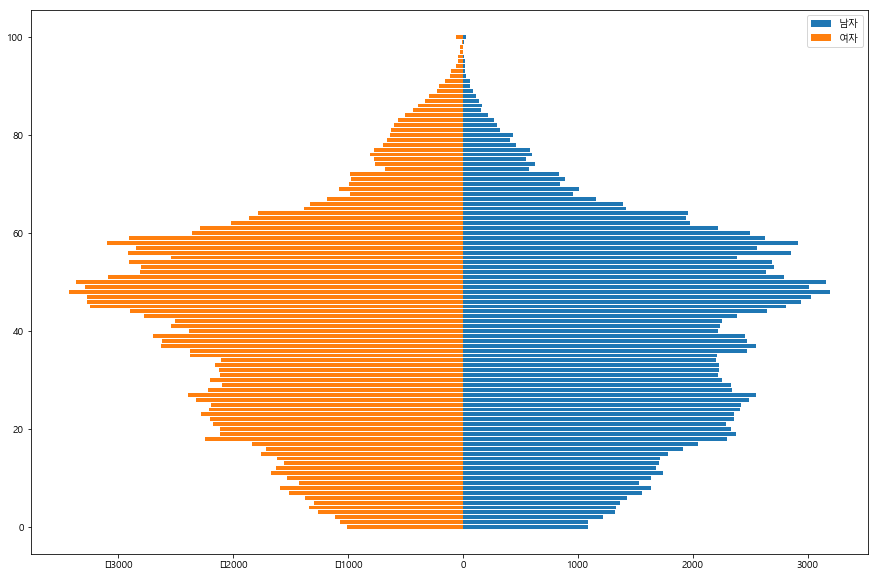

In [164]:
plt.figure(figsize=(15, 10))
plt.barh(np.arange(len(man_age)), man_age, label='남자')
plt.barh(np.arange(len(woman_age)), -woman_age, label='여자')
plt.legend()
plt.show()

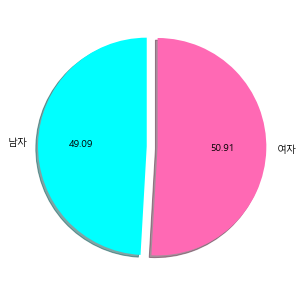

In [189]:
plt.figure(figsize=(5, 5))
plt.axis('normal')
color = ['aqua', 'hotpink']
plt.pie([man_age.sum(), woman_age.sum()], labels=['남자', '여자'], autopct='%.2f', colors=color, startangle=90, shadow=True, explode=[0, 0.1])
plt.show()

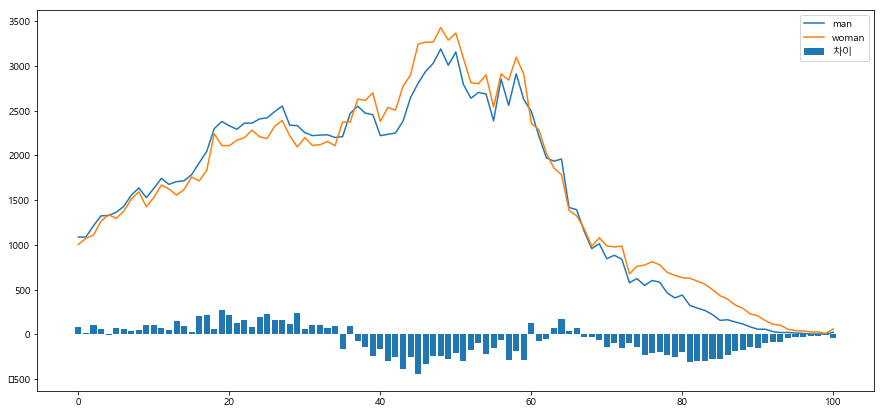

In [194]:
plt.figure(figsize=(15, 7))
plt.plot(man_age, label='man')
plt.plot(woman_age, label='woman')
plt.bar(np.arange(len(man_age)), (man_age - woman_age), label='차이')
plt.legend()
plt.show()

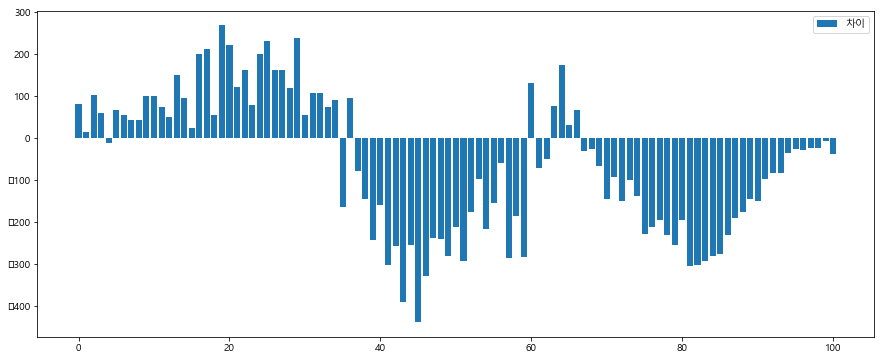

In [152]:
plt.figure(figsize=(15, 6))
plt.bar(np.arange(len(man_age)), (man_age - woman_age), label='차이')
plt.legend()
plt.show()

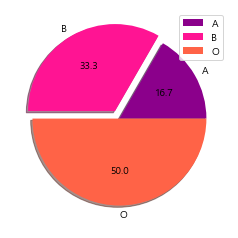

In [192]:
# 교재 130, 134
plt.rc('font', family='Malgun Gothic')
color = ['darkmagenta', 'deeppink', 'tomato']
plt.pie([10, 20, 30], labels=['A', 'B', 'O'], autopct='%.1f', explode=(0, 0.1, 0), colors=color, shadow=True)
plt.legend()
plt.show()

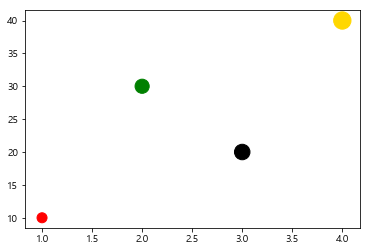

In [204]:
# 교재 144 산점도 그래프 (scatter)
size = [100, 200, 240, 300]
color = ['red', 'green', 'black', 'gold']
plt.scatter([1, 2, 3, 4], [10, 30, 20, 40], s=size, c=color)
plt.show()

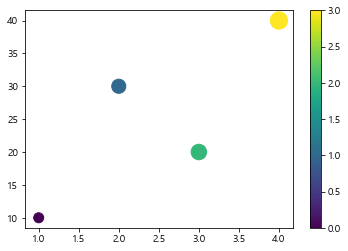

In [208]:
plt.scatter([1, 2, 3, 4], [10, 30, 20, 40], s=size, c=range(4))
plt.colorbar()
plt.show()

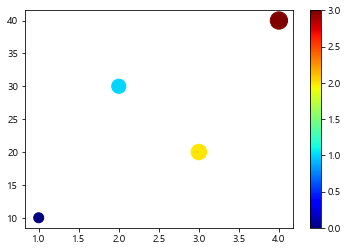

In [212]:
# cmap : 컬러맵
plt.scatter([1, 2, 3, 4], [10, 30, 20, 40], s=size, c=range(4), cmap='jet')
plt.colorbar()
plt.show()

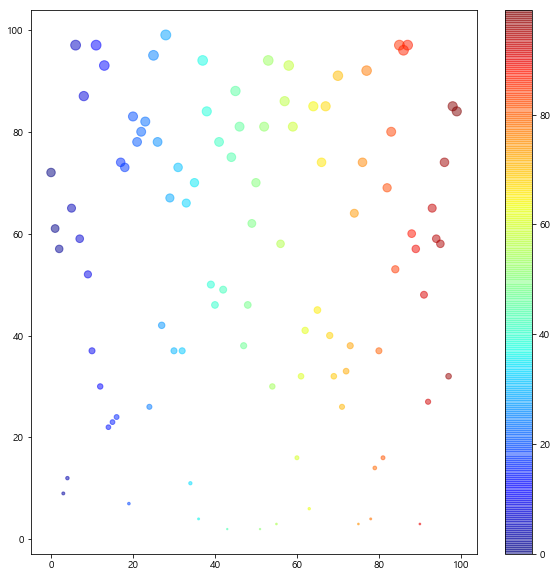

In [224]:
# alpha : 투명도
y = np.random.randint(0, 100, size=100)
plt.figure(figsize=(10, 10))
plt.scatter(range(100), y, s=y, c=range(len(y)), cmap='jet', alpha=0.5)
plt.colorbar()
plt.show()

### 그래프의 종류
- plot(x) plot(x, y) 선
- hist(x) 히스토그램
- boxplot(x) 박스(분포)
- bar(x, y) barh(x, y) 막대그래프
- pie(x) 원
- scatter(x, y) 산점도